In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

[-0.2, 0.2, -0.2, 0.2]

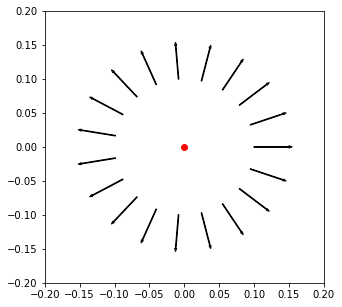

In [2]:
k = 9e9                           
Q = 0.1e-6                        

fig = plt.figure(figsize=(5,5))
rSource = np.array([0,0])         
rObs = []
r = []
E = []
Escale = []
n = 0

for i in np.linspace(0,2*np.pi,20):
    rObs.append(np.array([0.1*np.cos(i),0.1*np.sin(i)]))          

    r.append(rObs[n] - rSource)                

    E.append(k*Q*r[n]/(np.linalg.norm(r[n]))**3)  

    Escale.append(np.linalg.norm(r[n])/np.linalg.norm(E[n])/2)     
    n +=1

plt.plot(0,0,'ro')
for j in range(0, len(rObs),1):
    plt.arrow(rObs[j][0],rObs[j][1],Escale[j]*E[j][0],Escale[j]*E[j][1])  

plt.axis([-.2,.2,-.2,.2])

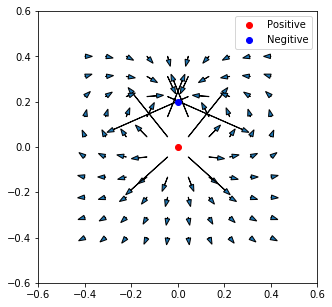

In [3]:
                     
class charge():

    def init(self, position, charge):
        self.position = np.array(position)
        self.charge = charge
        
q1 = charge()
q2 = charge()
q1.init([0,0],Q)
q2.init([0,.2],-Q)

fig = plt.figure(figsize=(5,5))

plt.plot(q1.position[0],q1.position[1],'ro', label = "Positive")
plt.plot(q2.position[0],q2.position[1],'bo', label = "Negitive")
plt.legend()

x = np.linspace(-.4,.4,10)
X,Y = np.meshgrid(x,x)
grid =[]
for i in range(0, len(X)):
    for j in range(0, len(Y)):
        grid.append([X[i][j],Y[i][j]])


rObs = np.array(grid)  
r1 = []
r2 = []
r = []
E1 = []
E2 = []
E = []
Escale = []

for n in range(0,len(rObs)):
           
    r1.append(rObs[n] - q1.position)               
    r2.append(rObs[n] - q2.position)
    
    E1.append(k*Q*r1[n]/(np.linalg.norm(r1[n]))**3)  
    E2.append(k*-Q*r2[n]/(np.linalg.norm(r2[n]))**3)
    E.append(E1[n]+E2[n])
    Escale = 1e-6   
    
for j in range(0, len(rObs),1):
    plt.arrow(rObs[j][0],rObs[j][1],Escale*E[j][0],Escale*E[j][1], head_width = .02)  

plt.axis([-.6,.6,-.6,.6])
plt.show()

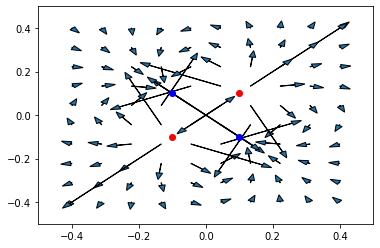

In [25]:
class charge():

    def init(self, position, charge):
        self.position = np.array(position)
        self.charge = charge

num_charges = 4
qs = []
pos =[[-.1,-.1],[-.1,.1],[.1,.1],[.1,-.1]]

for i in range(0,num_charges):
    qs.append(charge())
    qs[i].init(pos[i], Q*(-1)**i)
    if qs[i].charge/Q == -1:
        plt.plot(qs[i].position[0],qs[i].position[1], "bo", label = "negitive")
    else:
        plt.plot(qs[i].position[0],qs[i].position[1], "ro", label = "positive")
        
x = np.linspace(-.4,.4,10)
X,Y = np.meshgrid(x,x)
grid =[]
for i in range(0, len(X)):
    for j in range(0, len(Y)):
        grid.append([X[i][j],Y[i][j]])
rObs = np.array(grid)

r1 = []
r2 = []
r3 = []
r4 = []
E1 = []
E2 = []
E3 = []
E4 = []
E = []


for n in range(0,len(rObs)):
           
    r1.append(rObs[n] - qs[0].position)               
    r2.append(rObs[n] - qs[1].position)
    r3.append(rObs[n] - qs[2].position)               
    r4.append(rObs[n] - qs[3].position)
    
    E1.append(k*qs[0].charge*r1[n]/(np.linalg.norm(r1[n]))**3)  
    E2.append(k*qs[1].charge*r2[n]/(np.linalg.norm(r2[n]))**3)
    E3.append(k*qs[2].charge*r3[n]/(np.linalg.norm(r3[n]))**3)  
    E4.append(k*qs[3].charge*r4[n]/(np.linalg.norm(r4[n]))**3)
    E.append(E1[n]+E2[n] + E3[n]+E4[n])
    Escale = 10**-6   
    
for j in range(0, len(rObs),1):
    plt.arrow(rObs[j][0],rObs[j][1],Escale*E[j][0],Escale*E[j][1], head_width = .02)  

plt.axis([-.5,.5,-.5,.5])
plt.show()

